In [1]:
import networkx as nx
import torch
import matplotlib.pyplot as plt
import numpy as np

In [2]:
g =nx.erdos_renyi_graph(n=40,p=0.05)

In [ ]:
Gcc = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
G0 = Gcc[0]

In [ ]:
nx.min_edge_cover(G0)

In [ ]:
a=nx.maximal_independent_set(G0)

In [ ]:
#nx.draw(G0,nodelist=a,node_color='b')
color_map = []
for node in G0:
    if node in a:
        color_map.append('blue')
    else: color_map.append('green') 
nx.draw(G0,node_color=color_map)

In [ ]:
nx.subgraph(G1)

In [1]:
import sys
import graph
import environment
import runner
import agent

C:\Users\Veillon Louis\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [300]:
import torch

In [24]:
g=graph.Graph("erdos_renyi",50,0.10)

In [193]:
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Input, Add, Dot, Concatenate, ReLU, Permute
from keras.activations import relu
from keras.optimizers import sgd
import keras.backend as K
import numpy as np

In [46]:
nodes=50
p=32
T=4
xv = Input(shape=(nodes,))
mu_init = Input(shape=(nodes,p))
adj = Input(shape=(nodes, nodes))

for t in range(T):
    if t==0:
        mu_1 = Dense(p, input_dim=nodes)(xv)
        mu_2 = Dense(p, input_dim=p)(Dot(axes=1)([p, mu_init]))
        mu = ReLU()(Add()([mu_1, mu_2]))
    else:
        mu_1 = Dense(p, input_dim=nodes)(xv)
        mu_2 = Dense(p, input_dim=p)(Dot(axes=1)([adj, mu]))
        mu = ReLU()(Add()([mu_1, mu_2]))

q_1=Dense(p, input_dim=p)(Dot(axes=1)([adj,mu]))
q_2=Dense(p,input_dim=p)(mu)
q=ReLU()(Concatenate()([q_1,q_2]))

model = Model(inputs=[xv, mu_init, adj], outputs=q)
model.compile(optimizer='rmsprop',
        loss='mse')

In [285]:
xv_=np.random.randn(1,nodes,1)
mu_init_=np.zeros((1,nodes,p))
adj_ = g.adj().todense() 
adj_ = np.expand_dims(adj_,axis=0)
qp=np.random.randn(1,nodes,1)

In [286]:
adj_.shape

(1, 50, 50)

In [290]:
model.fit(x=[xv_,mu_init,adj],y=qp,epochs=10,steps_per_epoch=20)

Epoch 1/10


InvalidArgumentError: Requested Tensor connection between nodes "input_300" and "input_300" would create a cycle.

In [299]:
nodes=50
p=32
T=3
xv = Input(batch_shape=(1,nodes,1))
mu_init = Input(batch_shape=(1,nodes,p))
adj = Input(batch_shape=(1,nodes,nodes))

for t in range(T):
    if t==0:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu_init]))
        mu = ReLU()(Add()([mu_1, mu_2]))
    else:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu]))
        mu = ReLU()(Add()([mu_1, mu_2]))

q_1=Dense(p)(Dot(axes=1)([adj,mu]))
q_2=Dense(p)(mu)
q_=Concatenate(axis=2)([q_1,q_2])
q=Dense(1,activation="relu")(q_)

model = Model(inputs=[xv, mu_init, adj], outputs=q)
model.compile(optimizer='rmsprop',
        loss='mse')
model.fit(epochs=1,steps_per_epoch=2,validation_steps=2)

UnboundLocalError: local variable 'val_ins' referenced before assignment

In [277]:
mu_2.name

'dense_440/add:0'

In [279]:
model.fit(x=[xv_,mu_init,adj],y=qp)

ValueError: If your data is in the form of symbolic tensors, you should specify the `steps_per_epoch` argument (instead of the `batch_size` argument, because symbolic tensors are expected to produce batches of input data).

In [216]:
mu.shape

TensorShape([Dimension(1), Dimension(50), Dimension(32)])

In [238]:
Concatenate(axis=2)([q_1,q_2]).shape

TensorShape([Dimension(1), Dimension(50), Dimension(64)])

In [241]:
q.shape

TensorShape([Dimension(1), Dimension(50), Dimension(1)])

In [179]:
a=Dot(axes=1)([adj,mu_init])

In [180]:
a.shape

TensorShape([Dimension(1), Dimension(50), Dimension(32)])

In [301]:
############ torch

In [ ]:
nodes=50
p=32
T=3
xv = Input(batch_shape=(1,nodes,1))
mu_init = Input(batch_shape=(1,nodes,p))
adj = Input(batch_shape=(1,nodes,nodes))

for t in range(T):
    if t==0:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu_init]))
        mu = ReLU()(Add()([mu_1, mu_2]))
    else:
        mu_1 = Dense(p)(xv)
        mu_2 = Dense(p)(Dot(axes=1)([adj,mu]))
        mu = ReLU()(Add()([mu_1, mu_2]))

q_1=Dense(p)(Dot(axes=1)([adj,mu]))
q_2=Dense(p)(mu)
q_=Concatenate(axis=2)([q_1,q_2])
q=Dense(1,activation="relu")(q_)

model = Model(inputs=[xv, mu_init, adj], outputs=q)
model.comp²ile(optimizer='rmsprop',
        loss='mse')
model.fit(epochs=1,steps_per_epoch=2,validation_steps=2)

In [374]:
batch_size=8
T=4
xv=torch.randn(batch_size,nodes,1)
mu_init=torch.randn(batch_size,nodes,p)
adj=torch.randn(batch_size,nodes,nodes)
y=torch.randn(batch_size,nodes,1)

class S2V_QN(torch.nn.Module):
    def __init__(self,p,nodes):
        
        super(S2V_QN,self).__init__()
        self.mu_1=torch.nn.Linear(1,p)
        self.mu_2=torch.nn.Linear(p,p)
        self.q_1=torch.nn.Linear(p,p)
        self.q_2=torch.nn.Linear(p,p)
        self.q=torch.nn.Linear(2*p,1)
    
    def forward(self,xv,adj,mu_init,T):

        for t in range(T):
            if t==0:
                mu_1=self.mu_1(xv)
                mu_2=self.mu_2(torch.matmul(adj,mu_init))
                mu=torch.add(mu_1,mu_2).clamp(0)
            
            else:
                mu_1=self.mu_1(xv)
                mu_2=self.mu_2(torch.matmul(adj,mu))
                mu=torch.add(mu_1,mu_2).clamp(0)
                

        q_1=self.q_1(torch.matmul(adj,mu))
        q_2=self.q_2(mu)
        q_=torch.cat((q_1,q_2),dim=2)
        q=self.q(q_)
        return q
model=S2V_QN(32,50)

criterion=torch.nn.MSELoss(reduction='sum')
optimizer=torch.optim.SGD(model.parameters(),lr=1e-10,momentum=0.9)
for t in range(67):
    y_pred = model(xv,adj,mu_init,T)
    loss = criterion(y_pred, y)
    print(t, loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

0 5490492.5
1 4922348.5
2 4045894.0
3 3151979.0
4 2426882.0
5 1919137.75
6 1589615.625
7 1368438.25
8 1196755.125
9 1041195.1875
10 896379.625
11 768445.5625
12 661838.9375
13 581369.125
14 524444.6875
15 485411.25
16 457722.8125
17 434859.0
18 412761.3125
19 389180.15625
20 363541.84375
21 336384.53125
22 309171.375
23 283132.59375
24 258996.1875
25 237293.34375
26 218073.171875
27 201087.921875
28 186005.921875
29 172509.796875
30 160302.6875
31 149311.453125
32 139540.15625
33 131075.046875
34 123983.078125
35 118268.0546875
36 113817.796875
37 110435.2421875
38 107841.1484375
39 105738.8046875
40 103831.9921875
41 101884.4609375
42 99750.5390625
43 97364.9609375
44 94749.3125
45 91983.3203125
46 89180.171875
47 86463.453125
48 83942.953125
49 81679.1875
50 79702.09375
51 77999.578125
52 76522.96875
53 75207.09375
54 73979.265625
55 72772.1171875
56 71543.5234375
57 70268.0234375
58 68940.9765625
59 67576.4609375
60 66199.1875
61 64839.02734375
62 63529.1015625
63 62289.45703125
64 

In [324]:
torch.cat((q_1,q_2),dim=1).shape

torch.Size([50, 1])

In [310]:
a.shape

torch.Size([50, 32])

In [338]:
mu_1.shape

torch.Size([1, 32])

In [339]:
mu_2.shape

torch.Size([50, 32])

In [638]:
xv=torch.randn(8,nodes,1)
mu_init=torch.randn(1,nodes,p)
#mu_init=np.random.randn(8,nodes,p)
adj=torch.randn(1,nodes,nodes)
mu1=torch.nn.Linear(1,p)(xv)
mu2=torch.nn.Linear(p,p)(torch.matmul(adj,mu_init))
mu_=torch.add(mu1,mu2).clamp(0)

mu1=torch.nn.Linear(1,p)(xv)
mu2=torch.nn.Linear(p,p)(torch.matmul(adj,mu_))
mu_=torch.add(mu1,mu2).clamp(0)

q_1=torch.nn.Linear(p,p)(torch.matmul(adj,mu_))
q_2=torch.nn.Linear(p,p)(mu_)
q_=torch.cat((q_1,q_2),dim=-1)
q=torch.nn.Linear(2*p,1)(q_)

In [456]:
q[2,0]

tensor(30.4772, grad_fn=<SelectBackward>)

##### q_1.shape

In [448]:
torch.matmul(adj,mu_).shape

torch.Size([50, 32])

In [639]:
q.shape

torch.Size([8, 50, 1])

In [413]:
torch.from_numpy(np.expand_dims(g.adj().todense().astype(int),axis=0))

torch.Size([1, 50, 50])

In [423]:
a=np.zeros(4)

In [424]:
b=3
c=4
d=np.zeros(4)

In [467]:
a=torch.zeros(8,1)
a[1]=1
np.sum(a.numpy())

1.0

In [438]:
memory.append((a,b,c,d))

In [439]:
memory

[(array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.])),
 (array([0., 0., 0., 0.]), 3, 4, array([0., 0., 0., 0.]))]

In [441]:
import random
minibatch = random.sample(memory, 8 - 1)
minibatch.append(memory[-1])

In [443]:
for a,b,c,d in minibatch:
    print(a)
    print(b)
    print(c)
    print(d)

[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]
[0. 0. 0. 0.]
3
4
[0. 0. 0. 0.]


In [481]:
observation=torch.zeros(6,1)

In [485]:
observation[1]=1

In [473]:
observation[observation==0]

tensor([0., 0., 0., 0., 0.])

In [483]:
a=observation.numpy()

In [484]:
np.random.choice(np.where(a==0)[0])

2

In [510]:
a=[1,2,3,4]

In [512]:
for i in range(1,4):
    print(i)

1
2
3


In [486]:
observation

tensor([[0.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.]])

In [500]:
#observation=observation.numpy()
q=torch.randn(6,1).detach().numpy()
np.where((q==np.max(q[observation==0])))[0]

array([5], dtype=int64)

In [496]:
q[observation==0

array([-1.511689  , -0.08753946, -0.33454165, -0.9054488 ], dtype=float32)

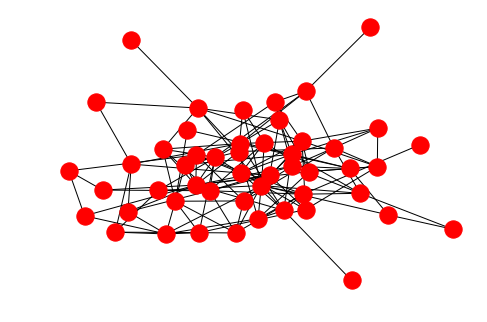

In [509]:

g=nx.gnp_random_graph(n=50,p=0.1)
nx.draw(g)

In [548]:
a=torch.zeros(1,16,1)
b=torch.ones(1,1)
list_=[]

In [554]:
list
list_.append((a,b,b,a))

In [535]:
np.array(list_[0][1])

array([[1.]], dtype=float32)

In [539]:
list_

[(tensor([[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.]]), tensor([[1.]]), tensor([[1.]]), tensor([[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.]])), (tensor([[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.]]), tensor([[1.]]), tensor([[1.]]), tensor([[0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
          [0.],
      

In [577]:
c=torch.empty(1,16,1)
b=list_[0][1]
for t,i in enumerate(list_):
    
    c=torch.cat((c,i[0]),dim=0)
    b=torch.cat((b,i[1]),dim=0)
c.shape

torch.Size([7, 16, 1])

In [575]:
torch.empty(16,1)

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]])

In [572]:
torch.max(c,dim=1)[0]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [578]:
d=torch.ones(6,3,1)

In [581]:
obs=torch.ones(6,3,1)
obs[1][2]=0

In [583]:
obs[0][1]=0

In [589]:
sel=obs*(-1e5)

In [590]:
d+sel

tensor([[[-99999.],
         [     1.],
         [-99999.]],

        [[-99999.],
         [-99999.],
         [     1.]],

        [[-99999.],
         [-99999.],
         [-99999.]],

        [[-99999.],
         [-99999.],
         [-99999.]],

        [[-99999.],
         [-99999.],
         [-99999.]],

        [[-99999.],
         [-99999.],
         [-99999.]]])

In [603]:
r=torch.cat((torch.tensor([[1.]]),torch.tensor([[3.]])))

In [605]:
g=torch.ones(2,1)

In [606]:
g+r

tensor([[2.],
        [4.]])

In [640]:
l=torch.randn(3,5,1)

In [641]:
l

tensor([[[ 1.2317],
         [ 0.7891],
         [-0.3123],
         [ 1.1800],
         [-1.1240]],

        [[ 0.5315],
         [-1.3737],
         [ 0.3886],
         [-0.8691],
         [-0.6254]],

        [[ 1.2393],
         [-1.3105],
         [-1.1882],
         [-0.0278],
         [ 0.6335]]])

In [644]:
l[range(3),torch.tensor([0,1,2]),:]

tensor([[ 1.2317],
        [-1.3737],
        [-1.1882]])

In [634]:
l

tensor([[ 1.0000,  1.1816, -0.2832, -0.5208,  1.7151],
        [-0.3762,  1.0000, -1.0023,  1.5804,  0.8807],
        [-0.0253,  0.6765,  1.0000,  0.4012,  0.7694]])

In [177]:
ll=[38.0, 35.0, 37.0, 38.0, 37.0, 35.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 37.0, 38.0, 38.0, 38.0, 38.0, 35.0, 38.0, 36.0, 34.0, 34.0, 37.0, 38.0, 35.0, 34.0, 38.0, 35.0, 38.0, 34.0, 38.0, 38.0, 35.0, 36.0, 38.0, 38.0, 38.0, 35.0, 38.0, 38.0, 38.0, 35.0, 38.0, 38.0, 33.0, 38.0, 38.0, 33.0, 32.0, 33.0, 28.0, 29.0, 32.0, 29.0, 29.0, 30.0, 29.0, 30.0, 31.0, 29.0, 29.0, 31.0, 30.0, 25.0, 30.0, 28.0, 30.0, 26.0, 27.0, 25.0, 26.0, 27.0, 26.0, 26.0, 26.0, 23.0, 23.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 21.0, 21.0, 20.0, 21.0, 20.0, 21.0, 21.0, 21.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.0, 20.0, 21.0, 21.0, 20.0, 20.0, 21.0, 21.0, 20.0, 21.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 25.0, 27.0, 20.0, 25.0, 27.0, 25.0, 25.0, 25.0, 25.0]
ll_w2V=[39.0, 38.0, 38.0, 34.0, 33.0, 34.0, 33.0, 31.0, 32.0, 35.0, 34.0, 34.0, 37.0, 38.0, 37.0, 38.0, 37.0, 36.0, 36.0, 35.0, 35.0, 33.0, 34.0, 34.0, 33.0, 34.0, 33.0, 33.0, 33.0, 32.0, 33.0, 34.0, 33.0, 33.0, 32.0, 32.0, 32.0, 32.0, 31.0, 31.0, 32.0, 31.0, 32.0, 31.0, 31.0, 30.0, 33.0, 31.0, 30.0, 31.0, 29.0, 27.0, 28.0, 28.0, 26.0, 30.0, 28.0, 30.0, 29.0, 26.0, 28.0, 26.0, 26.0, 26.0, 29.0, 26.0, 27.0, 26.0, 28.0, 28.0, 26.0, 27.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 28.0, 27.0, 28.0, 26.0, 27.0, 26.0, 27.0, 27.0, 29.0, 24.0, 26.0, 26.0, 26.0, 27.0, 28.0, 26.0, 29.0, 28.0, 26.0, 27.0, 26.0, 27.0, 27.0, 26.0, 28.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 26.0, 28.0, 26.0, 26.0, 26.0, 27.0, 27.0, 28.0, 27.0, 26.0, 28.0, 28.0, 26.0, 26.0, 27.0, 28.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 26.0, 25.0, 23.0, 27.0, 23.0]

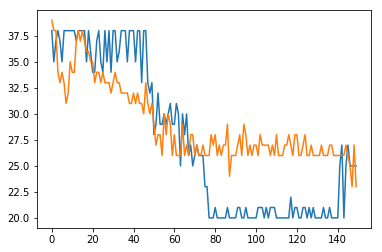

In [178]:
plt.plot(ll)
plt.plot(ll_w2V)

In [65]:
from gensim.models import Word2Vec
import random
from sklearn import decomposition

ImportError: cannot import name 'Skipgram'

In [324]:
num_paths=400
path_length=40
seed=12
embed_size=32
window_size=5

In [180]:
G = nx.gnp_random_graph(n=60,p=0.1,seed=seed)

In [181]:
nx.neighbors(G,1)

In [325]:
def random_walk(G,path_length, alpha=0, rand=random.Random(), start=None):    
    
    if start:
        path = [start]
    else:
        # Sampling is uniform w.r.t V, and not w.r.t E
        path = [rand.choice(list(G.nodes()))]

    while len(path) < path_length:
        cur = path[-1]
        if len(G[cur]) > 0:
            if rand.random() >= alpha:
                path.append(rand.choice(list(nx.neighbors(G,cur))))
            else:
                path.append(path[0])
        else:
            break
    return [str(node) for node in path]

In [326]:




def build_deepwalk_corpus(G, num_paths, path_length, alpha=0,rand=random.Random(0)):
    walks = []

    nodes = list(G.nodes())

    for cnt in range(num_paths):
        rand.shuffle(nodes)
        for node in nodes:
            
            walks.append(random_walk(G,path_length, rand=rand, alpha=alpha, start=node))

    return walks

In [327]:
print("Walking...")
walks = build_deepwalk_corpus(g, num_paths=num_paths,
                                    path_length=path_length, alpha=0,
                                    rand=random.Random(seed))

Walking...


In [328]:
vertex_counts=dict(G.degree())

In [341]:
print("Training...")
model = Word2Vec(walks,size=embed_size, window=window_size
                 , min_count=0, sg=1, hs=1,iter=1, negative=0,compute_loss=True)
#model.build_vocab(walks)
model.get_latest_training_loss()

Training...


1028889.1875

In [342]:
  # prepare the model vocabulary
for i in range(10):
    print(model.train(walks,epochs=1,total_examples=model.corpus_count,compute_loss=True))
    print(model.get_latest_training_loss())
#model.get_latest_training_loss()

(150474, 640000)
1081370.125
(150513, 640000)
1075910.625
(150018, 640000)
1083984.875
(150089, 640000)
1176549.875
(149842, 640000)
1008046.375
(151426, 640000)
1043706.25
(150839, 640000)
1026026.4375
(150817, 640000)
1130195.375
(150108, 640000)
1031201.8125
(150442, 640000)
1025832.25


In [343]:
X=model[list(model.wv.vocab)]

C:\Users\Veillon Louis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [344]:
words = map(int,list(model.wv.vocab))
deg=list(words)

In [345]:
s=[i[1] for i in list(g.degree(deg))]

In [346]:
deg_n=list(nx.average_neighbor_degree(g,list(words)).values())

In [347]:
c=[deg_n[i] for i in deg]

In [348]:
pca = decomposition.PCA(n_components=2)

result = pca.fit_transform(X)

In [349]:
u=torch.from_numpy(np.expand_dims(X,axis=0))
u.shape

torch.Size([1, 40, 32])

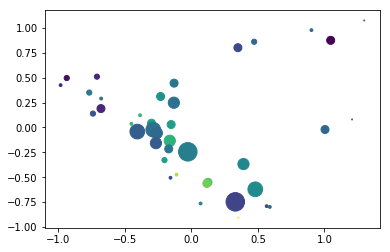

In [350]:

plt.scatter(result[:, 0], result[:, 1],s=[i**3 for i in s],c=c)

In [217]:
X=model_skip[model_skip.wv.vocab]

C:\Users\Veillon Louis\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [218]:
pca = decomposition.PCA(n_components=2)

result = pca.fit_transform(X)

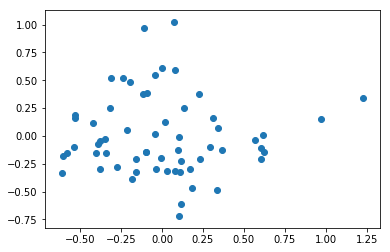

In [219]:

plt.scatter(result[:, 0], result[:, 1])


In [277]:
g = nx.erdos_renyi_graph(n=50, p=0.07, seed=seed)

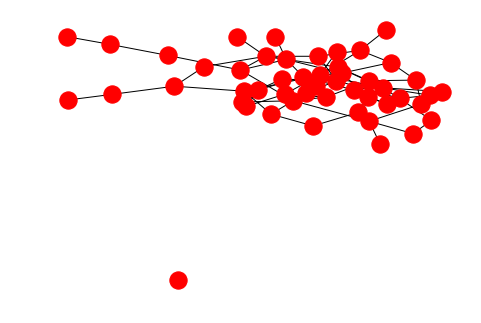

In [278]:
nx.draw(g)

In [287]:
g[9]

AtlasView({26: {}, 38: {}, 39: {}})

In [290]:
nx.adjacency_matrix(g).todense()[9].sum()

3

In [291]:
l=[29.0, 34.0, 36.0, 37.0, 36.0, 37.0, 37.0, 37.0, 37.0, 38.0, 38.0, 38.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 34.0, 32.0, 32.0, 33.0, 34.0, 31.0, 33.0, 34.0, 35.0, 33.0, 34.0, 33.0, 32.0, 33.0, 32.0, 32.0, 34.0, 33.0, 34.0, 34.0, 33.0, 33.0, 34.0, 35.0, 32.0, 32.0, 32.0, 32.0, 32.0, 29.0, 26.0, 29.0, 26.0, 27.0, 27.0, 27.0, 28.0, 29.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 27.0, 27.0, 27.0, 27.0, 26.0, 27.0, 26.0, 27.0, 28.0, 26.0, 27.0, 28.0, 26.0, 26.0, 28.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 27.0, 29.0, 28.0, 26.0, 27.0, 28.0, 26.0, 26.0, 26.0, 28.0, 27.0, 27.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 26.0, 27.0, 27.0, 26.0, 27.0, 27.0, 27.0, 26.0, 26.0, 28.0, 27.0, 26.0, 27.0, 29.0, 26.0, 25.0, 28.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 27.0, 26.0, 29.0, 26.0, 26.0, 26.0, 27.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 26.0, 28.0, 24.0, 27.0, 27.0, 27.0, 26.0]

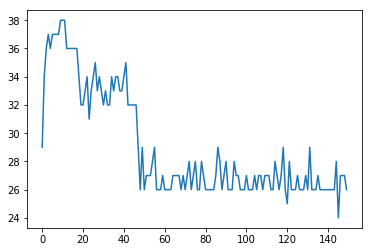

In [292]:
plt.plot(l)

In [304]:
seed=12
g = nx.erdos_renyi_graph(n=40, p=0.10, seed=seed)

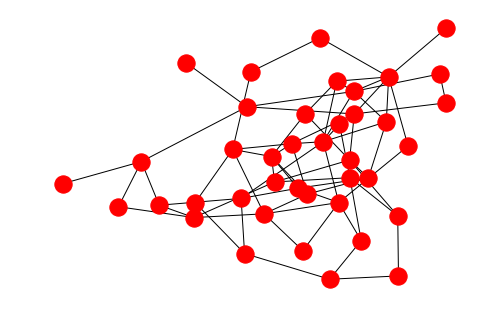

In [305]:
nx.draw(g)

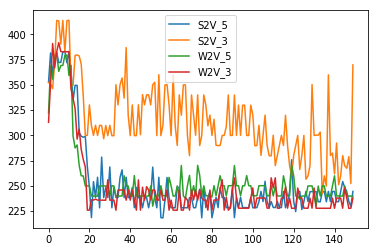

In [9]:
l_s2V_r2_5=[352.7248308566741, 381.4600192460666, 359.16362679862493, 379.32293933471976, 382.0555117252666, 371.90396643360657, 372.2236827682573, 382.54333954643226, 382.8811235204283, 371.7552965261283, 382.5739060503756, 363.04020965227267, 334.49284137227954, 349.49612348996345, 349.3759900083172, 302.5438685951179, 299.10087579562725, 298.12188394805366, 298.8610531161149, 268.95167046977565, 248.7651847687759, 218.53560985224448, 254.12744710081546, 238.485269022608, 258.4538372912206, 228.25281361569608, 278.44659636803146, 238.37170459313967, 248.37180712218958, 238.4436019939844, 268.65285042378645, 228.28463179751427, 248.39736240883116, 238.407704558087, 238.3811019939844, 258.3424297013648, 265.8468524720644, 238.30930712218958, 258.49543313184495, 238.4221180585299, 238.34520455808703, 248.34060721889446, 228.3327049200439, 248.30930712218958, 238.30930712218955, 238.31525950314196, 228.28463179751427, 238.38399169687418, 238.42509586243483, 228.2702049200439, 238.41253547596142, 268.52843759027746, 238.35642666930914, 228.2702049200439, 258.4441881736324, 218.5004366920713, 218.2388623495709, 236.4864889208065, 258.27020492004397, 238.27020492004394, 228.27020492004394, 228.27020492004394, 228.27020492004394, 248.44323203912364, 248.34060721889452, 228.33040862730647, 228.31784824083303, 228.33040862730647, 228.27020492004394, 238.40477066877378, 238.33040862730647, 228.33040862730647, 228.31784824083303, 238.43068032757816, 246.62703839885597, 218.3193089718132, 248.4106091285596, 228.43068032757816, 238.27020492004394, 244.38545076621955, 218.40560382701034, 228.43068032757816, 238.4770981254665, 228.43068032757816, 248.43068032757816, 238.43068032757816, 238.4713207216668, 228.43068032757816, 228.43068032757816, 228.46407979847763, 248.61876479213313, 218.47727651891117, 238.48147397837178, 228.43068032757816, 238.66190700320135, 228.49318032757816, 228.43068032757816, 228.43068032757816, 228.43068032757816, 238.43068032757816, 228.2702049200439, 228.5072943878364, 228.43068032757816, 234.38393561470443, 244.45026558103436, 234.4027209566748, 254.49935560806557, 234.4145512953201, 228.4624985093963, 234.38467872465802, 228.6058805564111, 228.4624985093963, 234.44636947713826, 228.5249985093963, 228.4624985093963, 244.44636947713826, 228.3020231018621, 234.44636947713826, 244.36800900949925, 275.8696957278203, 234.44636947713826, 224.4929656684713, 244.4145512953201, 244.3576889413989, 226.58496179490308, 234.4145512953201, 244.4463694771383, 234.4463694771383, 244.2540758877859, 244.2540758877859, 244.2540758877859, 244.23668458343803, 234.23668458343803, 234.23668458343803, 243.61151915746612, 244.57125001800347, 234.23668458343803, 244.5123867931555, 234.35768894139892, 244.3460977768666, 244.4463694771383, 234.28589406960407, 234.28589406960404, 244.49499548880772, 254.25623085425866, 248.28026766042515, 244.26850276525622, 234.4463694771383, 229.72275480917918, 244.4463694771383]
l_s2V_r2_3=[352.2369222144628, 350.6401166585577, 346.2104014704054, 371.99494741859894, 413.61294275927287, 413.18138220518574, 390.1724826727588, 413.66523004636196, 382.59400031948627, 413.45441832223577, 413.8572899023649, 349.2909984038013, 349.34199780481174, 379.1065720245539, 379.40946001205947, 378.5823800530794, 370.40887151081586, 338.4484430395388, 299.83629928679875, 299.8685054059614, 330.06960885798014, 309.79989486995953, 299.87175215920814, 309.9541843469035, 299.8321009891222, 309.8321009891222, 309.66034649519275, 296.57809541294165, 309.71256425793683, 299.66034649519275, 309.88645804156107, 299.62503478596796, 299.5693380672278, 350.066807737532, 330.06960885798014, 350.026049103894, 356.7610484702926, 336.8138843579532, 386.80720041885684, 319.6868101482868, 299.6690045038507, 330.0439678323391, 299.6690045038507, 299.6690045038507, 330.2106344990058, 300.6225692318057, 340.2106344990058, 330.2106344990058, 340.0439678323391, 340.05587259424385, 330.06960885798014, 350.04396783233915, 352.4933227734436, 299.68823527308155, 359.93158125495887, 299.6690045038507, 309.9738832872545, 349.83573984147046, 350.2106344990058, 330.1080703964417, 299.6690045038507, 359.93158125495887, 309.7382476600504, 290.01091856138595, 340.0612770221547, 319.9495502152872, 349.93158125495887, 349.90755528093297, 299.64236160521295, 279.8622450356227, 339.8975241084018, 319.7060415408877, 300.0333294795013, 339.9396260956444, 289.8357892789038, 299.6826399827036, 339.9122299907547, 330.08151361988484, 309.3955206976995, 319.96663522722514, 299.87435120287597, 315.84754304371484, 290.0438189899908, 289.81014825326275, 289.9604856566575, 299.8487101772349, 299.9539957697328, 308.321133765757, 339.91577437665205, 299.8487101772349, 299.874351202876, 339.8231817840595, 299.93529026381503, 329.8625870411118, 299.9576845362093, 329.81127702215474, 329.8231817840595, 299.8487101772349, 299.75710964813436, 329.8231817840595, 320.0439678323391, 289.616042473459, 289.87435120287597, 309.9396260956444, 280.1271523233242, 299.95433197799736, 319.9304441839689, 289.93204351056823, 279.7986701486261, 279.67671094442164, 300.0477139855418, 270.0140987102706, 279.93204351056823, 289.893263661782, 299.89461035548806, 289.93204351056823, 319.8030098263875, 289.89461035548806, 270.11666281283465, 259.68734619267303, 279.9096055182773, 289.93204351056823, 299.84262775085193, 266.18376785295897, 280.1166628128347, 299.89461035548806, 256.5341256950589, 259.7051318928116, 270.0695202755386, 350.17871653419144, 299.7921677599946, 300.16248093806456, 300.058673714692, 303.126575645069, 242.27322070367444, 259.8384618471337, 249.6977094906524, 359.8088206017635, 280.058673714692, 282.3334976312655, 261.97995961781476, 292.34536030025413, 251.11876532455588, 259.8126999988654, 279.89461035548806, 269.8030098263875, 267.39252098808305, 278.8351058596758, 252.22585862542854, 369.6867967922397]
l_w2v_r2_5=[322.07988831830943, 369.023374822059, 355.51186206580945, 375.9079924072029, 380.67072398361876, 363.2350370487213, 368.9572476256686, 369.18933186696347, 379.15878240667706, 379.46243192480034, 359.2500409629357, 369.31481287718134, 299.311601059759, 287.57931832300255, 290.40524224313697, 270.27900125215916, 259.9675005306584, 259.7617570051781, 249.98594261489004, 249.88676182491974, 249.91451404346142, 239.86338812259868, 239.86338812259868, 239.86338812259868, 239.7085873677979, 249.86338812259868, 249.86338812259868, 249.80896330764753, 249.87193513114568, 249.75862621783676, 239.97291193212249, 250.18920582341636, 249.86338812259868, 239.86338812259868, 239.84910240831294, 239.86338812259868, 239.97291193212249, 259.94910240831297, 249.8750840290314, 249.8133492725598, 239.7776738368844, 239.86338812259868, 260.1832145924251, 239.86338812259868, 239.86338812259868, 239.9014833606939, 239.86338812259868, 240.15230106151162, 239.86338812259868, 239.86338812259868, 249.86338812259868, 229.8919595511701, 239.86338812259868, 239.9414833606939, 240.16452328373379, 250.1245232837338, 240.1245232837338, 240.1245232837338, 240.1245232837338, 258.39317407738463, 249.97688018609074, 239.86096832017887, 239.91100717021772, 249.91100717021774, 240.12452328373382, 270.1364280456386, 240.1245232837338, 237.55309471230524, 250.19717840638899, 260.33126931547986, 240.1523010615116, 250.13621919016654, 240.1523010615116, 270.2413494400336, 260.33682487103545, 240.1245232837338, 250.03440506861563, 240.1245232837338, 240.11261852182903, 240.1245232837338, 239.00150741071795, 250.19288547709604, 240.1245232837338, 250.15209220603953, 260.0192951785057, 250.24465315386368, 250.0864280456386, 240.11499947421, 250.0864280456386, 250.0864280456386, 250.11261852182903, 270.08642804563857, 250.1264280456386, 250.08245979167035, 240.11261852182903, 250.09833280754336, 250.0864280456386, 260.08642804563857, 250.0864280456386, 250.0864280456386, 240.1523010615116, 240.11261852182903, 240.11261852182906, 250.11261852182903, 250.12055502976554, 250.11261852182903, 250.16579312500363, 240.11261852182906, 240.11261852182906, 250.11261852182903, 240.04328230249283, 249.91100717021774, 239.91100717021774, 239.91100717021774, 239.91100717021774, 259.90205612126664, 249.91955417876474, 240.03351799272855, 239.91100717021774, 270.3987296329402, 260.09090135011195, 239.91100717021774, 239.91100717021774, 236.6564617156723, 239.896721455932, 239.91100717021774, 239.90096832017886, 249.86096832017887, 249.90096832017886, 249.91100717021774, 239.86096832017887, 229.88243574164625, 249.75620641541695, 239.86096832017887, 249.86096832017887, 249.86096832017887, 239.77525403446458, 239.86096832017887, 239.86096832017887, 249.946721455932, 259.9195541787647, 239.9538643130748, 239.9004808544282, 239.86096832017887, 239.84668260589314, 249.82071412992462, 239.98347914268965, 239.86338812259868, 239.8133492725598, 239.8133492725598]
l_w2v_r2_3=[312.85476197115764, 352.81521735413577, 390.8529351785793, 366.76223923623445, 382.79077250035954, 391.6975651464303, 382.88842447843336, 382.5607212704757, 382.976811463058, 382.50329963693156, 382.9860564152683, 345.7670221026357, 336.530647903299, 326.45720156709575, 296.22485890629014, 306.0257762578888, 285.96259372051276, 276.13911117847647, 268.6797174279243, 225.90648115633567, 225.91789256774706, 236.12777741005843, 235.8771017769563, 236.82141015641153, 235.88498653731713, 235.84932399917852, 235.80867261431206, 235.81027562065645, 235.75938740877683, 255.95982381788266, 235.80867261431206, 235.81306780163197, 235.82316881173298, 225.85668280989483, 245.82316881173298, 245.78678630854012, 245.91187848915234, 245.7724864805453, 235.82316881173298, 245.95740850679795, 235.82316881173298, 245.78983547839965, 235.87296301807612, 225.91789256774706, 255.84779228883255, 225.91789256774706, 248.6582436771336, 235.82316881173298, 249.1830488903704, 245.82316881173298, 236.03443218428671, 245.82316881173298, 245.8493239991785, 235.86981625867935, 235.78983547839965, 245.8493239991785, 235.82316881173298, 235.82316881173298, 245.74168733025152, 225.92589468751387, 235.8108881099786, 225.91789256774706, 225.88455923441373, 225.87314782300234, 245.9915238913784, 225.90648115633567, 225.9505988033945, 238.54853488971307, 235.90648115633567, 225.90648115633567, 245.86686642669073, 235.90840484726795, 245.81904533341597, 235.77842406698826, 246.08079843549166, 237.8735405943022, 235.8117574003216, 235.87314782300234, 225.90648115633567, 245.8117574003216, 225.95648115633566, 235.95871614994994, 235.8117574003216, 235.93088031830598, 245.88013346869766, 256.01355186340635, 225.92870337855788, 238.67047407027295, 225.92870337855786, 227.85112262434293, 245.5629495238424, 257.83306022697013, 237.8861653593857, 227.84537549790616, 227.85112262434293, 227.91133767810638, 227.85112262434293, 227.85112262434293, 227.85112262434293, 237.75639886832886, 247.91969748723832, 227.92301804917955, 237.88968471584622, 237.92301804917955, 237.88968471584622, 237.92301804917957, 237.9896847158462, 227.92301804917955, 227.85112262434293, 257.93022315087114, 247.88815966138, 257.92454869539836, 227.92301804917955, 227.8177892910096, 237.89143188286855, 238.05685643301794, 248.67260109288026, 227.90093105346173, 237.85112262434293, 227.69831497798694, 227.85112262434293, 227.85112262434293, 247.8482946279666, 237.8482946279666, 237.85112262434296, 227.85112262434293, 227.87890040212076, 227.7955670687874, 237.76122789089985, 227.87941331770594, 247.8020186816906, 227.8020186816906, 227.8020186816906, 227.8020186816906, 227.8230713132696, 227.8020186816906, 227.80201868169064, 227.80201868169064, 227.7686853483573, 237.80201868169064, 227.79052442881706, 237.90454393421587, 237.78350016317214, 237.82054688731563, 227.80201868169064, 247.92818266079584, 237.8309210658562, 227.64714538734364, 227.80201868169064, 237.8703947500667]

plt.plot(l_s2V_r2_5, label= "S2V_5")
plt.plot(l_s2V_r2_3, label="S2V_3")
plt.plot(l_w2v_r2_5,label="W2V_5")
plt.plot(l_w2v_r2_3,label="W2V_3")
plt.legend()
plt.show()